## Assignment 1: due June 14.
In your favorite programming language, write code to generate a random network consisting of 1,000 nodes and at least 10,000 edges. Save the network as an edge list, a METIS file, and in GraphML format. Plot the degree distribution. Report the number of isolated nodes and connected components. Your code should accompany your write up along with the three data files (edge list as tsv, METIS, GraphML). Thus, you could just upload a folder in here that is appropriately named. Code can be reported as a link to a Github repo. Assignments should be written up using LaTeX and saved as a PDF. 

## OUTLINE

This Notebook contains many different ways to generate a graph. It is structured in the following manner:


1 - Python code that connects two nodes at random using a random index generator.


2 - Using the networkx python library, 2 graphs are generated, one using the `random_regular_graph` function and the other the `random_geometric_graph`.


3 - Using the networkit python library, a graoh is generated us

At the end of each section, there is a visualization of the degree distribution and the overall network, along with the number of connected components and singleton nodes.

## PYTHON

This is a basic manner of constructing an edge list. A list of nodes is created, a number of edges is set and the connections are made randomly. 

The methos is structured in such a way as to prevent self loops and duplicate edges.

In [53]:
import numpy as np
import pandas as pd
import csv

This is where the nodes are created. For this experiment, 1000 nodes were created.

In [54]:
nodes = [str(i) for i in range(1,1001)]

len(nodes)

1000

This is necessary for organizing the edge pair.

In [55]:
# gotten from here: https://stackoverflow.com/questions/38555385/removing-duplicate-edges-from-graph-in-python-list

def normalize(edge):
    n1, n2 = edge
    if n1 > n2: 
        n1, n2 = n2, n1
    return (n1, n2)

This is where the `edge_list` and `edge_map` are made. The first is necessary for the creation of the ´tsv´ file, the latter helps when creating the METIS file.

In [56]:
# empty list
edge_list = []

# already initialized with an empty list for all noes
edge_map = {i:[] for i in nodes}

# defining the number of edges
n_edges = 15000


def populate_edge_list(n, edge_list, nodes):

    # n is the number of edges to be appended to the edge_list and edge_map
    for _ in range(n):

        # two random indexes
        from_node = np.random.randint(0,len(nodes))
        to_node = np.random.randint(0,len(nodes))

        # there can be no self loops
        while from_node == to_node:
            to_node = np.random.randint(0,len(nodes))

        # reorders the nodes to always be sorted, this prevents duplicate edges down the line
        from_node, to_node = normalize((nodes[from_node], nodes[to_node]))
        
        # appends the edge pair to the edge list
        edge_list.append((from_node, to_node))

        # only puts the connection in the edge_map if it does no exist
        if to_node not in edge_map[from_node]:
            edge_map[from_node].append(to_node)
    


while len(edge_list) < n_edges:

    # always populates the exact amount needed to complete the number of edges
    populate_edge_list(n_edges - len(edge_list), edge_list, nodes)

    # gets rid of duplicate edges
    edge_list = list(set(edge_list))

len(edge_list)

15000

#### File Outputs

In [59]:
# gotten from here: https://stackoverflow.com/questions/63107145/writing-to-a-tsv-file-from-multiple-list-in-python


# writed the edge list on to a tsv file
with open('data/Python/EdgeList/output.tsv', 'w', newline='') as f_output:
    tsv_output = csv.writer(f_output, delimiter='\t')
    tsv_output.writerow([f'# Nodes: {len(nodes)} Edges: {n_edges}'])
    tsv_output.writerow(['# from_node, to_node'])
    for from_node, to_node in edge_list:
        tsv_output.writerow([f"{from_node} {to_node}"])


# writed the METIS file using the edge_map
with open('data/Python/METIS//data.metis', 'w', newline='') as f_output:
    tsv_output = csv.writer(f_output, delimiter='\t')
    tsv_output.writerow([f'{len(nodes)} {n_edges}'])
    for node in nodes:
        line = " ".join(edge_map[node])
        if len(line)>1:
            tsv_output.writerow([line])



In [60]:
import networkx as nx 

G = nx.read_edgelist("./data/Python/EdgeList/output.tsv", nodetype=int)

In [61]:
nx.write_graphml(G, "./data/Python/GraphML/ArtifitialGraph.xml")

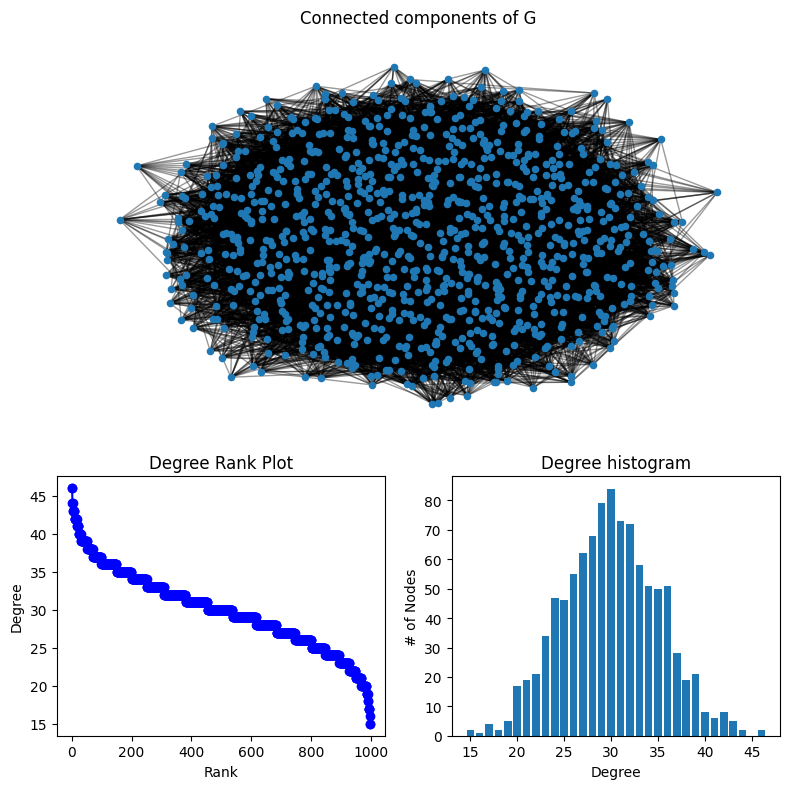

In [62]:
# source: https://networkx.org/documentation/stable/auto_examples/drawing/plot_degree.html

import matplotlib.pyplot as plt


degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [63]:
nx.number_connected_components(G), nx.number_of_isolates(G)

(1, 0)

## NETWORKX

For these examples, we will be using the networkx python library, which has several graph creation functions.

The ones used are:

- `random_regular_graph`

- `random_geometric_graph`

In [64]:
import pandas as pd
import numpy as np
import networkx as nx

### Random Regular Graph

This creates a graph where each node has the same degree, or the same number of neighbors.

The resulting graph has no self-loops or parallel edges.

Its documentation can be found [here](https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.random_regular_graph.html#random-regular-graph)

In [79]:
G = nx.random_regular_graph(20, 1000)

print("Number of Nodes:", G.number_of_nodes())

print("Number of Edges:", G.number_of_edges())

Number of Nodes: 1000
Number of Edges: 10000


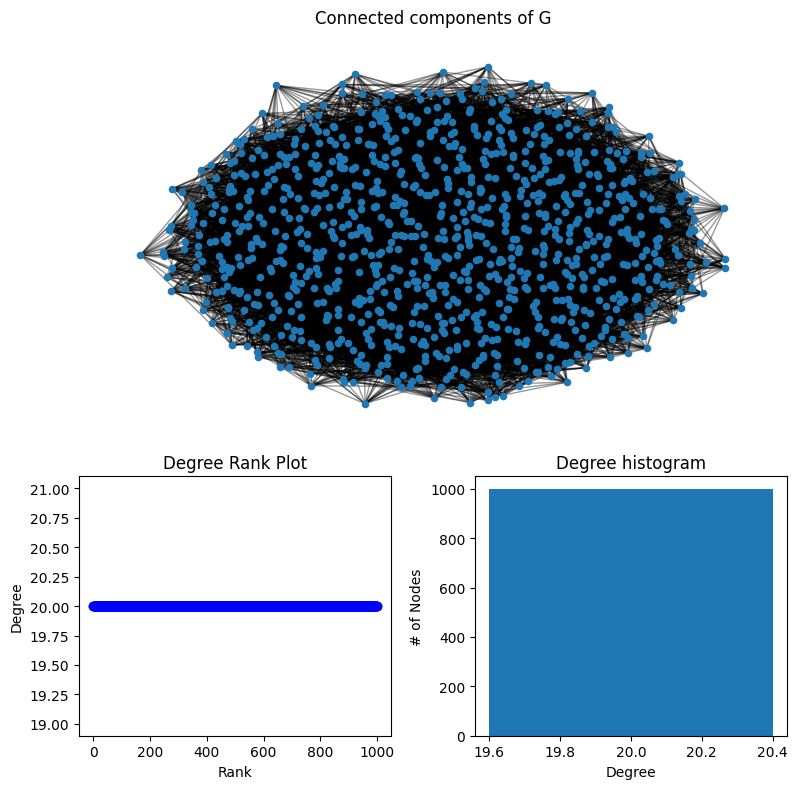

In [80]:
# source: https://networkx.org/documentation/stable/auto_examples/drawing/plot_degree.html

import matplotlib.pyplot as plt


degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()

plt.show()

### Random Geometric Graph

Returns a random geometric graph in the unit cube of dimensions, that is set by the ´dim´ parameter.

The random geometric graph model places `n` nodes uniformly at random in the unit cube. Two nodes are joined by an edge if the distance between the nodes is at most `radius`.

Its documentation can be found [here](https://networkx.org/documentation/stable/reference/generated/networkx.generators.geometric.random_geometric_graph.html)

In [76]:
G = nx.random_geometric_graph(1000, 0.125)

print("Number of Nodes:", G.number_of_nodes())

print("Number of Edges:", G.number_of_edges())

Number of Nodes: 1000
Number of Edges: 22397


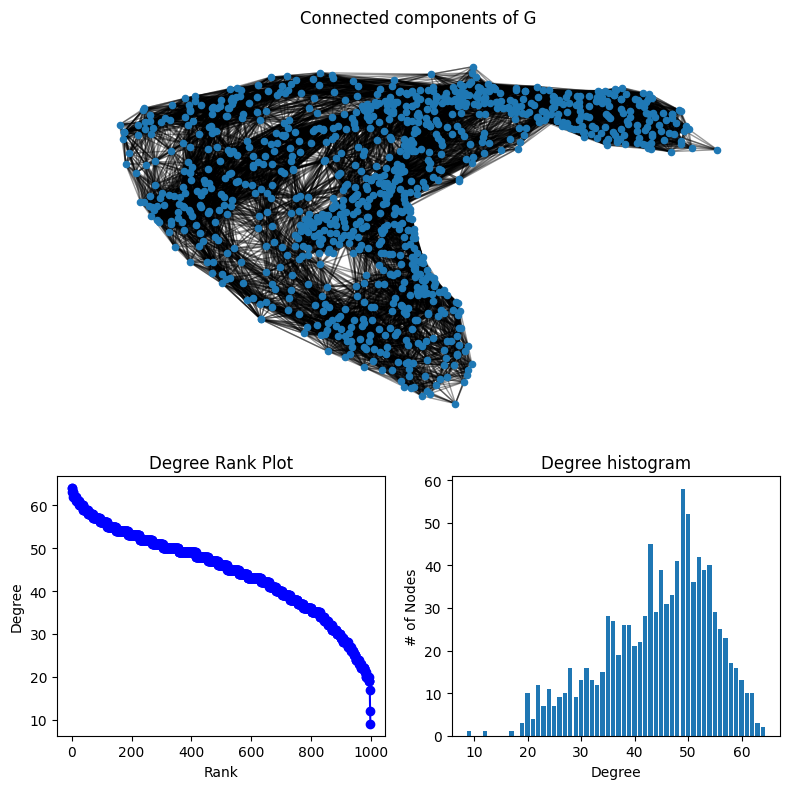

In [73]:
# source: https://networkx.org/documentation/stable/auto_examples/drawing/plot_degree.html

import matplotlib.pyplot as plt


degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()

plt.show()

### NETWORKIT

For these examples, we will be using the networkit python library, which has several graph creation functions.

The ones used are:

- `random_regular_graph`

- `random_geometric_graph`